# Tarea 1 Geodinamica 201520 - Luis Alejandro Rodríguez Parra 
Punto 2: Recall that the Hawaiian Island chain is being formed as the Pacific plate passes over a hotspot. Suppose that Mauna Loa volcano will become extinct when it moves 100 km away from its present location over the hotspot. (a) How long will this take? (b) Eventually, the first of the islands in the chain will hit some type of landmass. Estimate when and where that will happen. 

Para resolver el problema primero tenemos que encontrar la velocidad de movimiento de la Placa del Pacifico respecto al hotspot. En este caso vamos a utilizar un polo de Euler Absoluto ubicado en latitud y longitud (- 61.7°, 97.2°) y que cuenta con velocidad angurar 9.67 x 10-7 deg/yr. Tambien utilizamos las cordenadas actuales del volcan Mauna Loa en latitud y longitud (19.46°, -155.59°).

In [1]:
%pylab inline
import numpy as np
import math

Populating the interactive namespace from numpy and matplotlib


Para hacer el calculo de la veolocidad escogemos el punto de Volcan Mauna Loa, tal como se muestra en la Figura 1.

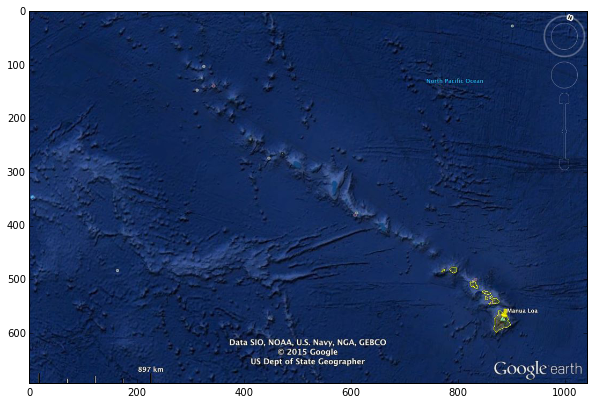

In [2]:
#Figura 1
im = plt.imread('Hawaii.jpg')
fig = figure(1, figsize=(10,10))
plt.imshow(im)

In [3]:
# Definimos: R = radio de la tierra (cm), la = latitud del punto (º), lo = longitud del punto (º)
# pla = latitud polo (º), plo = longitud polo (º), w = velocidad angular (deg/yr)
R = 6370.8E5
la = 19.46
lo = -155.46
pla = -61.7
plo = 97.2
w = 9.67E-7

In [4]:
#Convertimos las unidades de las cordenadas y la velocidad angular a radianes
DR = pi/180
lar = la*DR
lor = lo*DR
plar = pla*DR
plor = plo*DR
wr = w*DR

Para convertir de Coordenadas esfericas a cartesianas utilizamos la transformación tal como se muestra en la Figura 2. Tomado de (Cox & Hart, 1986)

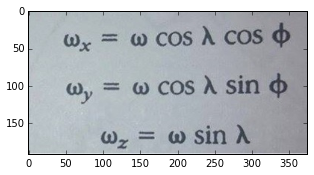

In [5]:
#Figura 2
im = plt.imread('Coor.jpg')
fig = figure(1, figsize=(5,5))
plt.imshow(im)

In [6]:
#Ya que tenemos las coordenadas en radianes necesitamos converir los datos a cordenadas cartesianes globales
X =  (cos(lar)*cos(lor)*R, cos(lar)*sin(lor)*R, sin(lar)*R)
PX = (cos(plar)*cos(plor)*wr, cos(plar)*sin(plor)*wr, sin(plar)*wr)

La anterior conversión de coordenadas se realizo siguiendo los datos de http://stackoverflow.com/questions/1185408/converting-from-longitude-latitude-to-cartesian-coordinates

In [7]:
#Realizamos el producto cruz entre los dos vectores, para obtener la velocidad de movimiento
V = cross(PX,X)
print V

[-2.02249832  8.33281367  4.58786675]


Ahora necesitamos realizar la conversión de coordenadas cartesianas globales a coordenadas locales, para esto necesitamos realizar una matriz de transformación. En este caso nosotros estamos utilizando la propuesta por (Cox & Hart, 1986), (Figura 3) 

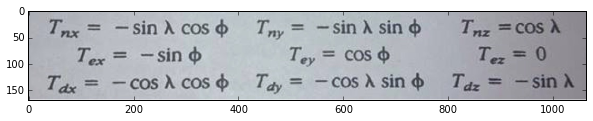

In [8]:
#Figura 3
im = plt.imread('Matriz.jpg')
fig = figure(1, figsize=(10,5))
plt.imshow(im)

In [9]:
#Definimos la matriz de rotación para convertir las cordenadas globales a cordenadas locales
TR = zeros((3,3))
TR[0,0] = -sin(lar)*cos(lor)
TR[0,1] = -sin(lar)*sin(lor)
TR[0,2] = cos(lar)
TR[1,0] = -sin(lor)
TR[1,1] = cos(lor)
TR[1,2] = 0
TR[2,0] = -cos(lar)*cos(lor)
TR[2,1] = -cos(lar)*sin(lor)
TR[2,2] = -sin(lar)
print TR

[[ 0.30305588  0.13836612  0.9428743 ]
 [ 0.41532841 -0.90967154  0.        ]
 [ 0.85770592  0.39160249 -0.33314869]]


In [10]:
#Multiplicamos la matriz de transformación por el vector de velocidad ya encontrado, y obtenemos
#la velocidad VF(Norte,Este,Up)
Vt = np.matrix(V).T
VF = TR*Vt
print VF

[[ 4.86583072]
 [-8.42012446]
 [ 0.        ]]


Las indicaciones generales se tomaron de: http://eqseis.geosc.psu.edu/~cammon/HTML/UsingMATLAB/PDF/ML2%20PlateVelocity.pdf

In [11]:
#La magnitud de la velocidad es en cm/yr
y = sqrt(VF[0,0]**2 + VF[1]**2 + VF[2]**2)
print "La magnitud de la velocidad es", y, "Cm/año"

La magnitud de la velocidad es [[ 9.72495781]] Cm/año


Ahora, si ausumimos que la velocidad de movimiento se va a manter constante tanto en magnitud como en dirección, podemos encontrar el tiempo que va atardar el moverse 100km. Es decir asumimos que el movimiento va a ser constante en el tiempo.

In [12]:
# Encontramos el tiempo que va a tardar en moverse 100km, con la relación t=d/v, ya conocemos la magnitud de la v
d = 100E5
t = d/y
print "El tiempo que va a tardar Mauna Loa en moverse 100km es:", t, "años"

El tiempo que va a tardar Mauna Loa en moverse 100km es: [[ 1028282.09579922]] años


Para Resolver el punto b, utilice la misma formula que se explico anteriormente, pero para encontrar la velocidad relativa entre la placa NorteAmericana y Pacifica. El punto utilizado se muestra en la Figura 4, el cual esta en el borde de las placas y corresponde a la dirección de movimiento actual de la placa

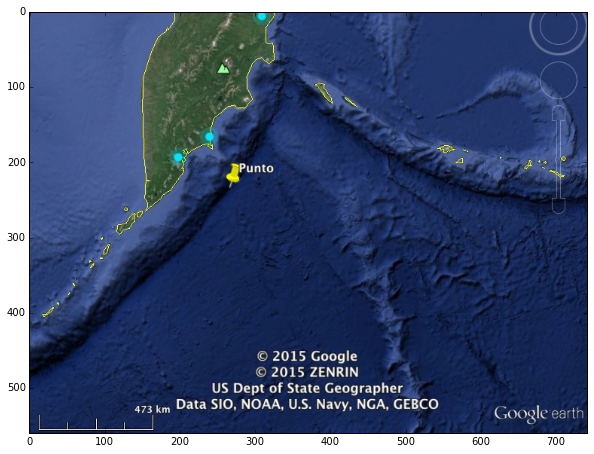

In [21]:
#Figura 4
im = plt.imread('Eurasia.jpg')
fig = figure(1, figsize=(10,10))
plt.imshow(im)

In [22]:
# Definimos: R = radio de la tierra (cm), la = latitud del punto (º), lo = longitud del punto (º)
# pla = latitud polo (º), plo = longitud polo (º), w = velocidad angular (deg/yr)
R = 6370.8E5
la = 51.8321
lo = 161.0929
pla = 48.7
plo = -78.2
w = 7.8E-7

In [23]:
#Convertimos las unidades de las cordenadas y la velocidad angular a radianes
DR = pi/180
lar = la*DR
lor = lo*DR
plar = pla*DR
plor = plo*DR
wr = w*DR

In [24]:
#Ya que tenemos las coordenadas en radianes necesitamos converir los datos a cordenadas cartesianes globales
X =  (cos(lar)*cos(lor)*R, cos(lar)*sin(lor)*R, sin(lar)*R)
PX = (cos(plar)*cos(plor)*wr, cos(plar)*sin(plor)*wr, sin(plar)*wr)

In [25]:
#Realizamos el producto cruz entre los dos vectores, para obtener la velocidad de movimiento
V = cross(X,PX)
print V

[ 5.70995708  4.72952659  3.04136722]


In [26]:
#Definimos la matriz de rotación para convertir las cordenadas globales a cordenadas locales
TR = zeros((3,3))
TR[0,0] = -sin(lar)*cos(lor)
TR[0,1] = -sin(lar)*sin(lor)
TR[0,2] = cos(lar)
TR[1,0] = -sin(lor)
TR[1,1] = cos(lor)
TR[1,2] = 0
TR[2,0] = -cos(lar)*cos(lor)
TR[2,1] = -cos(lar)*sin(lor)
TR[2,2] = -sin(lar)
print TR

[[ 0.7437838  -0.25475709  0.61796802]
 [-0.32403465 -0.94604521  0.        ]
 [ 0.58462569 -0.20024305 -0.78620323]]


In [27]:
#Multiplicamos la matriz de transformación por el vector de velocidad ya encontrado, y obtenemos
#la velocidad VF(Norte,Este,Up)
Vt = np.matrix(V).T
VF = TR*Vt
print VF

[[  4.92156085e+00]
 [ -6.32456994e+00]
 [  2.22044605e-16]]


In [28]:
#La magnitud de la velocidad es en cm/yr
y = sqrt(VF[0,0]**2 + VF[1]**2 + VF[2]**2)
print "La magnitud de la velocidad es", y, "Cm/año"

La magnitud de la velocidad es [[ 8.01385963]] Cm/año


Para deteminar el angulo de movimiento, podemos asumir que el movimiento unicamente se da en dos dimensiones y podemos encontrar el angulo que se forma de inclinación (Figura 5). Tambien podemos determinar la distancia entre el primer volcan de la cordillera del Emperador y el limite de placa, como se ilustra en la misma figura.

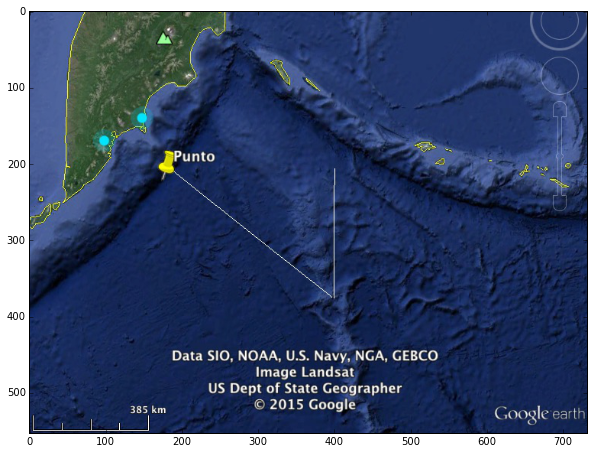

In [29]:
#Figura 5
im = plt.imread('Figura5.jpg')
fig = figure(1, figsize=(10,10))
plt.imshow(im)

In [30]:
#Para sacar el angulo de movimiento determinamos las variables q y w
q = -VF[0]
w = -VF[1]
E = math.degrees(math.atan(q/w))
Angulo = 90+E

print "El angulo de inclinación del Norte al Oeste del vector de velocidad es:", Angulo,"º"


El angulo de inclinación del Norte al Oeste del vector de velocidad es: 52.1111846374 º


In [31]:
# Encontramos el tiempo que va a tardar en moverse 645,8km, con la relación t=d/v, ya conocemos la magnitud de la v
d = 645.8E5
t = d/y
print "El tiempo que va a tardar en desaparecer el primer volcan, el cual esta a una distancia de 645.8km es:", t, "años"

El tiempo que va a tardar en desaparecer el primer volcan, el cual esta a una distancia de 645.8km es: [[ 8058538.95414078]] años


La zona hacia donde se va a mover el volcan corresponde al limite de placas entre Eurasia-Pacifico y se muestra puntualmente en el punto 1 de la Figura 5